## Step 1: `import` packages

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

import math as mt

In more detail, the imports are:
- `QuantumCircuit`: can be thought as the instructions of the quantum system. It holds all your quantum operations.
- `AerSimulator`: is the Aer high performance circuit simulator.
- `plot_histogram`: creates histograms.

## Step 2: build your circuit

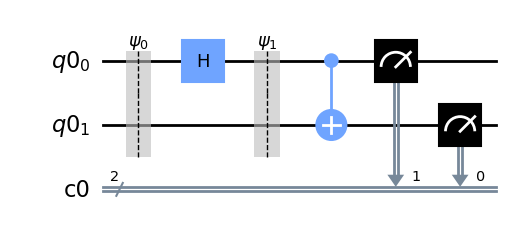

In [2]:
# register is variable that 'holds' 2 quantum bits.
q_register = QuantumRegister(2)

# register is a variable that 'holds' 2 classical bits.
c_register = ClassicalRegister(2)

# Now we build a quantum circuit with 2 quantum bits, both initialized at |0}.
circuit  = QuantumCircuit(q_register,c_register)

# Visual effects
circuit.barrier(label='$\psi_{0}$')

# It's time to add some quantum gates:
circuit.h(0)
circuit.barrier(label='$\psi_{1}$')
circuit.cnot(0,1)

# To visualize the circuit
circuit.draw(output='mpl')

# Map the quantum measurement to the classical bits
circuit.measure(q_register[0],c_register[1])
circuit.measure(q_register[1],c_register[0])

# Draw the circuit
circuit.draw(output='mpl')


What do we expect as results of the measurements?
- $\psi_{0} = \lvert 0_{0} \rangle \otimes \lvert 0_{1} \rangle$
- $\psi_{1} = (H \otimes I) (\lvert 0_{0}\rangle \otimes \lvert 0_{1} \rangle) = (H \lvert 0_{0} \rangle) \otimes (I \lvert 0_{1} \rangle) = H \lvert 0_{0} \rangle \otimes \lvert 0_{1} \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\  1 & -1  \end{bmatrix} \begin{bmatrix} 1 \\ 0  \end{bmatrix} \otimes \lvert 0_{1} \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1  \end{bmatrix} \otimes \lvert 0_{1} \rangle = \frac{\lvert 0 \rangle + \lvert 1 \rangle}{\sqrt{2}} \otimes \lvert 0_{1} \rangle = \lvert +_{0} \rangle \otimes \lvert 0_{1} \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \frac{\lvert 00 \rangle + \lvert 10 \rangle}{\sqrt{2}} $
- $\psi_{2} = \frac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt{2}}$

What are the possible outcomes?
- $P(\psi_{2} = \lvert 00 \rangle) = 1/2$
- $P(\psi_{2} = \lvert 11 \rangle) = 1/2$

In [2]:
# Use Aer's AerSimulator
simulator = AerSimulator()

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)

# To plot results
plot_histogram(counts,color='red')

NameError: name 'AerSimulator' is not defined

Using the BELL gate we defined before, try to build and run a QuantumCircuit that outputs the Bell state $\vert\beta_{11}\rangle = \frac{\vert01\rangle - \vert10\rangle}{\sqrt{2}}$ and measures the output

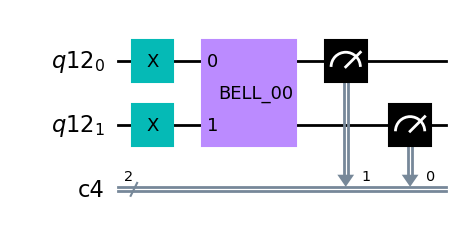

In [7]:
q_register = QuantumRegister(2);

circuit_bell_00 = QuantumCircuit(q_register)

circuit_bell_00.h(q_register[0])
circuit_bell_00.cnot(q_register[0],q_register[1])

bell_00 = circuit_bell_00.to_instruction(label='BELL_00')

q_reg = QuantumRegister(2)
c_reg = ClassicalRegister(2)

circuit_bell_11 = QuantumCircuit(q_reg,c_reg)
circuit_bell_11.x(q_reg[0])
circuit_bell_11.x(q_reg[1])
circuit_bell_11.append(bell_00,q_reg[:])

circuit_bell_11.measure(q_reg[0],c_reg[1])
circuit_bell_11.measure(q_reg[1],c_reg[0])

circuit_bell_11.draw(output='mpl')

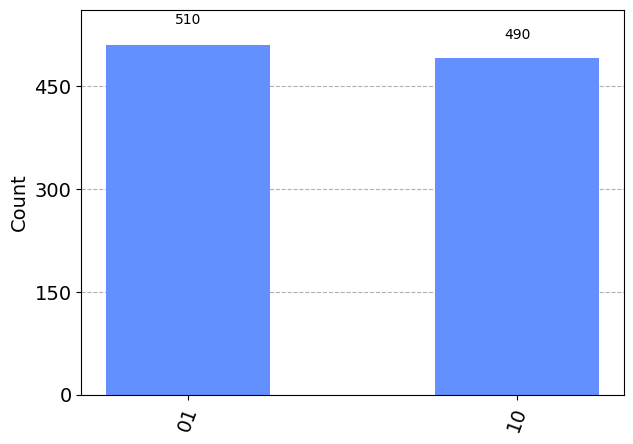

In [9]:
# Use Aer's AerSimulator
simulator = AerSimulator()

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit_bell_11, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)

# To plot results
plot_histogram(counts)

## Quantum Computing theory

### Special 1-qubit quantum gates

#### Identity ####
$I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$
- Action on computational basis: $I \lvert 0 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \lvert 0 \rangle$,    $I \lvert 1 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \lvert 1 \rangle$

#### Pauli X ####
$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
- Action on computational basis: $X \lvert 0 \rangle = \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \lvert 1 \rangle$,    $X \lvert 1 \rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \lvert 0 \rangle$

#### Pauli Y ####
$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$
- Action on computational basis: $Y \lvert 0 \rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ i \end{bmatrix} = i \lvert 1 \rangle$,    $Y \lvert 1 \rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} -i \\ 0 \end{bmatrix} = -i \lvert 0 \rangle$

#### Pauli Z ####
$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$
- Action on computational basis: $Z \lvert 0 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \lvert 0 \rangle$,    $Z \lvert 1 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix} = - \lvert 1 \rangle$

#### Phase S ####
$S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$
- Action on computational basis: $S \lvert 0 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \lvert 0 \rangle$,    $S \lvert 1 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ i \end{bmatrix} = i \lvert 1 \rangle$

#### T ####
$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}$
- Action on computational basis: $T \lvert 0 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \lvert 0 \rangle$,    $T \lvert 1 \rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ e^{i\pi/4} \end{bmatrix} = e^{i\pi/4} \lvert 1 \rangle$

#### Hadamard ####
$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$
- Action on computational basis: $H \lvert 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{\lvert 0 \rangle + \lvert 1 \rangle}{\sqrt{2}} = \lvert + \rangle$,    $H \lvert 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \frac{\lvert 0 \rangle - \lvert 1 \rangle}{\sqrt{2}} = \lvert - \rangle$

## Exercise (1)

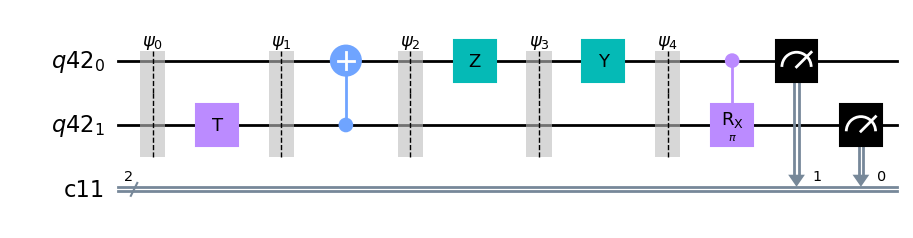

In [21]:
# register is variable that 'holds' 2 quantum bits.
q_register = QuantumRegister(2)

# register is a variable that 'holds' 2 classical bits.
c_register = ClassicalRegister(2)

# Now we build a quantum circuit with 2 quantum bits, both initialized at |0}.
circuit  = QuantumCircuit(q_register,c_register)

# Visual effects
circuit.barrier(label='$\psi_{0}$')

# It's time to add some quantum gates:
circuit.t(1)
circuit.barrier(label='$\psi_{1}$')
circuit.cnot(1,0)
circuit.barrier(label='$\psi_{2}$')
circuit.z(0)
circuit.barrier(label='$\psi_{3}$')
circuit.y(0)
circuit.barrier(label='$\psi_{4}$')
circuit.crx(mt.pi,0,1)

# To visualize the circuit
circuit.draw(output='mpl')

# Map the quantum measurement to the classical bits
circuit.measure(q_register[0],c_register[1])
circuit.measure(q_register[1],c_register[0])

# Draw the circuit
circuit.draw(output='mpl')

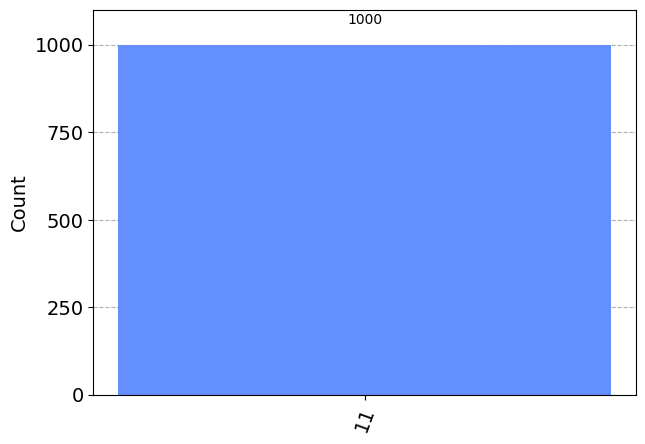

In [22]:
simulator = AerSimulator()

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)

# To plot results
plot_histogram(counts)

## Exercise (2)

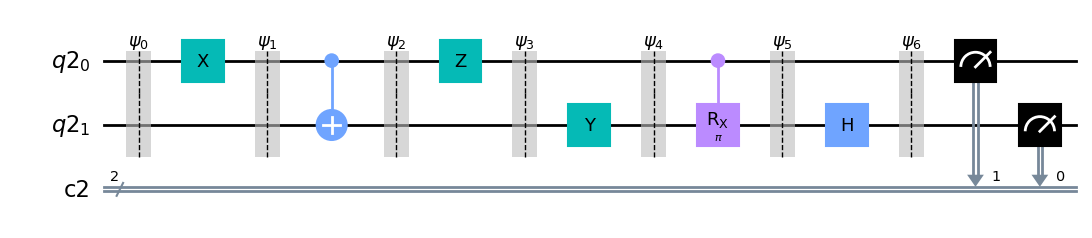

In [4]:
# register is variable that 'holds' 2 quantum bits.
q_register = QuantumRegister(2)

# register is a variable that 'holds' 2 classical bits.
c_register = ClassicalRegister(2)

# Now we build a quantum circuit with 2 quantum bits, both initialized at |0}.
circuit  = QuantumCircuit(q_register,c_register)

# Visual effects
circuit.barrier(label='$\psi_{0}$')

# It's time to add some quantum gates:
circuit.x(0)
circuit.barrier(label='$\psi_{1}$')
circuit.cnot(0,1)
circuit.barrier(label='$\psi_{2}$')
circuit.z(0)
circuit.barrier(label='$\psi_{3}$')
circuit.y(1)
circuit.barrier(label='$\psi_{4}$')
circuit.crx(mt.pi,0,1)
circuit.barrier(label='$\psi_{5}$')
circuit.h(1)
circuit.barrier(label='$\psi_{6}$')

# To visualize the circuit
circuit.draw(output='mpl')

# Map the quantum measurement to the classical bits
circuit.measure(q_register[0],c_register[1])
circuit.measure(q_register[1],c_register[0])

# Draw the circuit
circuit.draw(output='mpl')

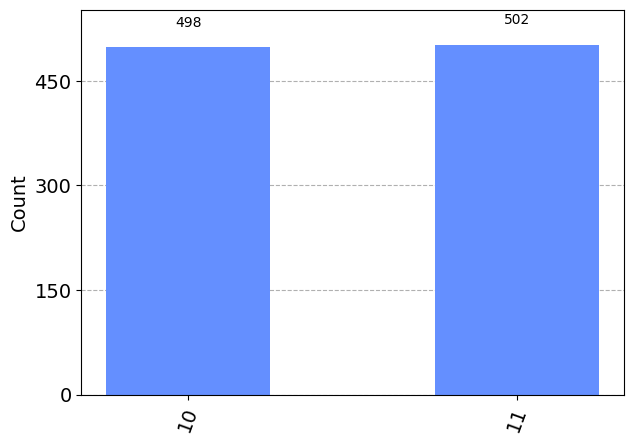

In [6]:
simulator = AerSimulator()

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)

# To plot results
plot_histogram(counts)